# <font style="color:blue">Train a Custom Object Detector using DarkNet YOLOv3</font>
In this notebook, we will learn how train a object detector for an object of our choice. We will use DarkNet framework and YOLO v3 architecture.

We will use images of Ambulance from Open Images Dataset.

# <font style="color:blue">Change Runtime Type</font>
Before proceeding, make sure that the notebook is running on the GPU. Go to Runtime -> Change runtime type -> Select hardware Accelerator as GPU.

# <font style="color:blue">1. Link Google Drive [ Optional ]</font>
Since it will take considerable amount of time to train the network, it is a good idea to link your Google Drive with Colab so that everything is backed up. So, if the runtime gets disconnected in the middle of something, you can simply re-link the drive and start working. To link drive, just run the cell below and follow the 2 steps.

1. It will generate a link. Click on the link to login to your google account
1. Get the authorization code and paste it in the box under the cell.

You may however choose to do everything without linking google drive and everything will work as usual.

### <font style="color:green">Uncomment the 2 cells below to link google drive</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive
%ls


/content/drive/My Drive
 build_log.txt       mask_code.zip             yolov_3/
'Colab Notebooks'/   mclass.names              yolov3-mask-code2.zip
 darknet/            New_yolov4/               yolov_4/
 invoice.jpg         P3_SA_RadiologyAI.ipynb   yolov4_test/


In [ ]:
import os
os.mkdir("yolov3")
%ls

# <font style="color:blue">2. Clone the DarkNet Repository </font>
We will use Alexey's darknet fork which has many modifications and improvements and is actively maintained by him.

In [3]:
#%cd yolov4/
%cd yolov_3/

!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
%ls

/content/drive/My Drive/yolov_3
fatal: destination path 'darknet' already exists and is not an empty directory.
/content/drive/My Drive/yolov_3/darknet
3rdparty/                    data_test.txt          results/
backup/                      data_train.txt         scripts/
build/                       image_yolov3.sh        src/
build_log.txt                image_yolov4.sh        test-image1.jpg
build.ps1                    include/               test-image2.jpg
cfg/                         json_mjpeg_streams.sh  test-image3.jpg
chart.png                    LICENSE                test-image4.jpg
chart_yolov3-mask-train.png  Makefile               test-video1.mp4
cmake/                       mask_dataset/          test-video2.mp4
CMakeLists.txt               mclass.names           train_v3_log.txt
darknet                      net_cam_v3.sh          vcpkg.json
darknet53.conv.74            net_cam_v4.sh          video_yolov3.sh
DarknetConfig.cmake.in       obj/                   video_yol

In [4]:
# confirm in darknet folder to compile CUDA
%pwd
#%ls


'/content/drive/My Drive/yolov_3/darknet'

# <font style="color:blue">3. Compile DarkNet</font>
We will first make some changes to the Makefile before we compile. Specifically, we will enable the following:
1. Build darknet with OpenCV
1. Build with CUDA enabled
1. Build with cuDNN enabled.

In [5]:
#%cd ..  # back out to mask dataset to access Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
##############################################
#!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
#!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
#!apt update
#!apt-get install libopencv-dev
###############################################


print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt
print("Done!")

Building. . . It might take 2-3 minutes
Done!


In [6]:
%pwd

'/content/drive/My Drive/yolov_3/darknet'

In [ ]:
#place yolo4 weights in darknet folder

#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
# Original File : https://pjreddie.com/media/files/darknet53.conv.74
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74
%ls

--2021-12-25 06:31:18--  https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/18dwbfth7prbf0h/darknet53.conv.74 [following]
--2021-12-25 06:31:18--  https://www.dropbox.com/s/dl/18dwbfth7prbf0h/darknet53.conv.74
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb4830b5c66c6fd9b5bf4a01209.dl.dropboxusercontent.com/cd/0/get/BcfiPF52xMpZg64m5LKRkc2nE1QSP-SzcmJG6UQolsvpdq0rhCBvpvwFQFiwgqu2umaQO-26aMkArNCJ62hfpe9gBNjJ6tv0exmxKSsAns7HGtkusLpI1wbE6nGhHpTdqdbUBb1PWP_-_QPM4Pj37qPk/file?dl=1# [following]
--2021-12-25 06:31:19--  https://ucb4830b5c66c6fd9b5bf4a01209.dl.dropboxusercontent.com/cd/0/get/BcfiPF52xMpZg64m5LKRkc2nE1QSP-SzcmJG6UQolsvpdq0rhCBvpvwFQFiwgqu2umaQO-

In [ ]:
#%cd data
%ls

###############################################################################
## -- MANUALLY --- place the cfg, daata and names files for both Yolo v3 and V4
###############################################################################
# darkenet folder
# darknet53.conv.74
#
#-----------------------------------------------------------------
#                     config folder(cfg)
#-----------------------------------------------------------------
# mclass.names            - change: Face with Mask, Face without mask
# yolov3-mask-test.cfg    - YOLOv3 configuration file for test
# yolov3-mask-train.cfg   - YOLOv3 configuration file for train
#-----------------------------------------------------------------
#                     data folder
#-----------------------------------------------------------------
# yolov3-mask-setup.data  - change: Classes = 2, rest remain same
#
#-----------------------------------------------------------------
#                     config folder(cfg)
#-----------------------------------------------------------------
# mv4class.names          - change: Face with Mask, Face without mask
# yolov4-mask-test.cfg    - YOLOv3 configuration file for test
# yolov4-mask-train.cfg   - YOLOv3 configuration file for train
#-----------------------------------------------------------------
#                     data folder
#------------------------------------------------------------------
# yolov4-mask-setup.data  - change: Classes = 2, rest remain same
#
# yolov4.conv.137
# yolov4.weights

3rdparty/               darknet.py              net_cam_v4.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build_log.txt           image_yolov3.sh*        results/
build.ps1               image_yolov4.sh*        scripts/
cfg/                    include/                src/
cmake/                  json_mjpeg_streams.sh*  vcpkg.json
CMakeLists.txt          LICENSE                 video_yolov3.sh*
darknet*                Makefile                video_yolov4.sh*
darknet53.conv.74       mask_dataset/           yolov3-mask-setup.data
DarknetConfig.cmake.in  mclass.names            yolov3-mask-test.cfg
darknet_images.py       net_cam_v3.sh*          yolov3-mask-train.cfg


In [ ]:
##############################################################################
## Create folder/directory mask_dataset to store data and manually place 
## mask_no_mask_dataset.zip
##############################################################################
#%cd 'build/darknet/x64/data'

import os
path2 = 'mask_dataset'
#os.makedirs(path2)
os.mkdir("mask_dataset")
%ls
# MOVE mask_no_mask_dataset.zip to mask_dataset

3rdparty/               darknet_images.py       net_cam_v3.sh*
backup/                 darknet.py              net_cam_v4.sh*
build/                  darknet_video.py        obj/
build_log.txt           data/                   README.md
build.ps1               image_yolov3.sh*        results/
cfg/                    image_yolov4.sh*        scripts/
cmake/                  include/                src/
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json
darknet*                LICENSE                 video_yolov3.sh*
darknet53.conv.74       Makefile                video_yolov4.sh*
DarknetConfig.cmake.in  mask_dataset/


In [ ]:
%ls
#%cd 'build/darknet/x64/data'
#%ls
%cd "mask_dataset"
%ls

3rdparty/               darknet.py              net_cam_v4.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build_log.txt           image_yolov3.sh*        results/
build.ps1               image_yolov4.sh*        scripts/
cfg/                    include/                src/
cmake/                  json_mjpeg_streams.sh*  vcpkg.json
CMakeLists.txt          LICENSE                 video_yolov3.sh*
darknet*                Makefile                video_yolov4.sh*
darknet53.conv.74       mask_dataset/           yolov3-mask-setup.data
DarknetConfig.cmake.in  mclass.names            yolov3-mask-test.cfg
darknet_images.py       net_cam_v3.sh*          yolov3-mask-train.cfg
/content/drive/My Drive/yolov3/darknet/mask_dataset
mask_no-mask_dataset.zip


In [ ]:
%pwd 

'/content/drive/My Drive/yolov3/darknet/mask_dataset'

In [ ]:
#
#-----------------------------------------------------------------------------
# MOVE mask_no_mask_dataset.zip to mask_dataset
#-----------------------------------------------------------------------------
#
##############################################################################
### change drive to the new mask_dataset folder containining the 
### manually placed mask/no mask datasets with anotations
##############################################################################
#%cd mask_dataset
#%ls
#####################################################
# and then unzip
#####################################################

!unzip -q 'mask_no-mask_dataset.zip'
!rm -rf 'mask_no-mask_dataset.zip'
%ls

In [ ]:
%cd ../
%ls

/content/drive/My Drive/yolov3/darknet
3rdparty/               darknet.py              net_cam_v4.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build_log.txt           image_yolov3.sh*        results/
build.ps1               image_yolov4.sh*        scripts/
cfg/                    include/                src/
cmake/                  json_mjpeg_streams.sh*  vcpkg.json
CMakeLists.txt          LICENSE                 video_yolov3.sh*
darknet*                Makefile                video_yolov4.sh*
darknet53.conv.74       mask_dataset/           yolov3-mask-setup.data
DarknetConfig.cmake.in  mclass.names            yolov3-mask-test.cfg
darknet_images.py       net_cam_v3.sh*          yolov3-mask-train.cfg


In [ ]:

#%cd data
%pwd

'/content/drive/My Drive/yolov3/darknet'

In [ ]:
import random
import os
import subprocess
import sys

#image_dir = dataset_path  # assign directory of data set to path
#image_dir = '/content/darknet/mask_no-mask_dataset'
#image_dir = '/content/darknet/mask_no-mask_dataset'
#image_dir = "./mask_dataset"
image_dir = "./mask_dataset"
#image_dir = "/content/drive/MyDrive/yolov4/darknet/data/mask_dataset"
#image_dir = "/build/darknet/x64/data"
#image_dir = "/darknet/x64/data"
#image_dir = "/x64/data"
#image_dir = "/data"
#image_dir = "/content/drive/MyDrive/darknet/build/darknet/x64/data"

f_val = open("data_test.txt", 'w')  #put this in darknet folder
f_train = open("data_train.txt", 'w') #put this in darknet folder

path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        #print("test ", ind)
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
            #print(" Val ", ind)
        else:
            f_train.write(image_dir+'/'+f+'\n')
            #print(" Train ", ind)


### debug ##

## find number train/test images in the datasets
filecnt = 0   
for f in os.listdir(image_dir):
	  filecnt += 1

print(len(os.listdir(image_dir))) 
print(filecnt)

### debug ##
f_train.close()
f_val.close()

2712
2712


In [ ]:
#%cd darknet
#%cd mask_dataset
###############################################
### change drive back to darkent 
###############################################
#%cd ..
%pwd
# !unzip -o yolov3-mask-code.zip
#%ls

'/content/drive/My Drive/yolov3/darknet'

In [ ]:
#classes = ["Mask" , "No Mask" ]
#maxImages = 400
#####################
## set datapath
#####################
#dataset_path = '/content/drive/MyDrive/darknet/mask_dataset' #'/content/darknet/mask_no-mask_dataset'  # Mask dataset path in google drive
#dataset_path = '/content/darknet/mask_no-mask_dataset'  # Mask dataset path in google drive
#/content/drive/MyDrive/darknet/mask_dataset
%pwd
#%cd darknet
#%ls


'/content/drive/My Drive/yolov3/darknet'

## <font style="color:blue">4.2. Prepare dataset files</font>
We need to create a txt file which contains the path to the images. These files will be used while setting up the training. 

The data is split into train and test in the ratio of 80:20. So, we will use 80% of the data for training and the rest for testing after a few iterations of training.

In [ ]:
%pwd


'/content/drive/My Drive/yolov4_test/darknet'

# <font style="color:blue">5. Download Code for YOLO Training</font>
We have shared the code for training in the link below. Explanation of each file follows next.

You can see there are 4 files which have been downloaded. We will go through each file in the next section.

# <font style="color:blue">8. Start Training </font>
For starting training using darknet, we need to execute the following command. Here we are specifying the
1. path to the setup file, 
1. path to config file, 
1. path to convolutional weights file 

and also passing some flags such as:

- **`dont_show`** which wont display the graphs. This is required for Colab since it does not have a display and it will crash if it tries to display, not if you run the notebook on your local system.
- **`map`** - this will calculate mAP - mean average precision for the test data which we have specified using the data_test.txt file which contains 20% of our data.

**train yolov3**

In [ ]:
!./darknet detector train yolov3-mask-setup.data yolov3-mask-train.cfg ./darknet53.conv.74 -dont_show -map 2> train_v3_log.txt

Streaming output truncated to the last 5000 lines.
 try to allocate additional workspace_size = 106.46 MB 
 CUDA allocate done! 
Loaded: 0.000043 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 84.52 %, best = 86.71 % 
 3131: 0.506817, 0.740992 avg loss, 0.001000 rate, 5.240626 seconds, 200384 images, 1.575919 hours left
Loaded: 0.000061 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 84.52 %, best = 86.71 % 
 3132: 0.849011, 0.751794 avg loss, 0.001000 rate, 5.394956 seconds, 200448 images, 1.572811 hours left
Loaded: 0.000079 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 84.52 %, best = 86.71 % 
 3133: 1.095147, 0.786129 avg loss, 0.001000 rate, 5.455631 seconds, 200512 images, 1.570091 hours left
Loaded: 0.000063 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.50 = 84.52 %, best = 86.71 % 
 3134: 1.010811, 0.808597 avg loss, 0.001000 rate, 5.407791 seconds, 200576

In [ ]:
#%pwd
#%cd ../../../..
#%pwd

In [7]:
%pwd
#%ls
#%pwd
#%cd darknet/



'/content/drive/My Drive/yolov_3/darknet'

# <font style="color:blue">Notes on Training</font>
From the above training process we can make the following observations:
1. The images are resized after every 10 iterations
It takes around 11 seconds per iteration which consists of 64 images for an image size of 576.
1. We can see that the training started very slowly in the first few iterations and then very gradually, the loss started reducing.
1. As we can see the learning rate increases gradually from 0 to 0.001 by the 100th batch ( burn_in was set to 100 ). It would stay there till the 1500th batch when it would again change to 0.0001.
1. mAP is calculated for every 100 iterations. It reaches >80% after 200 iterations.
1. You can check out the training graph for mAP v/s iterations which is saved in the file **chart.png**

## <font style="color:blue">Download our trained weights</font>
You can download our weights which we trained using the link below.

# <font style="color:blue">9. Perform Inference</font>
Finally, let us use the trained model to perform inference on some unseen images from the internet.

We have written a simple utility function which can be used to display the input and output similar to what we did in the previous section

We are already familiar with the inference code which we saw in the previous section.

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

**yolov3:  Test test image 1 for faces with or without mask**

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 256 K-images (4 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image1.jpg: Predicted in 17.603000 milli-seconds.
Mask: 100%


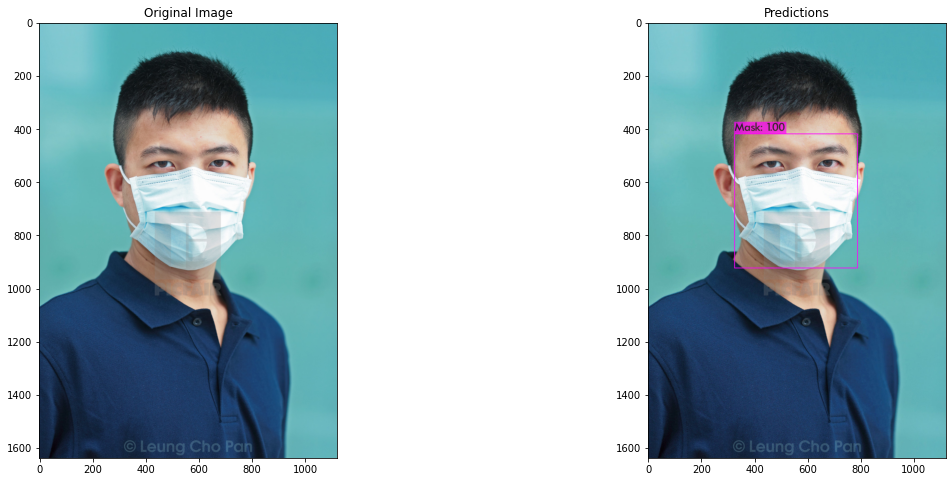

In [12]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_final.weights test-image1.jpg -thresh .6  2> /dev/null
display_output("test-image1.jpg")


We can see that the Ambulance from our previous example is now getting detected. 

Let us see some more examples!

**yolov3:  Test test image 2 for faces with or without mask**

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 256 K-images (4 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image2.jpg: Predicted in 17.630000 milli-seconds.
Mask: 100%
Mask: 100%
Mask: 72%
No Mask: 100%
Mask: 98%


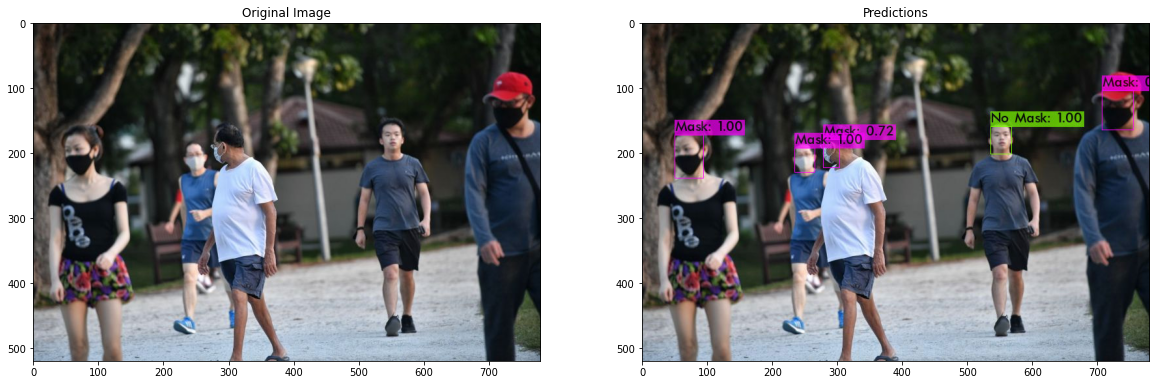

In [11]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_final.weights test-image2.jpg -thresh .6  2> /dev/null
display_output("test-image2.jpg")

**yolov3:  Test test image 3 for faces with or without mask**

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 211 K-images (3 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image3.jpg: Predicted in 19.465000 milli-seconds.
Mask: 100%
Mask: 96%
Mask: 100%
No Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 99%
Mask: 100%
Mask: 100%


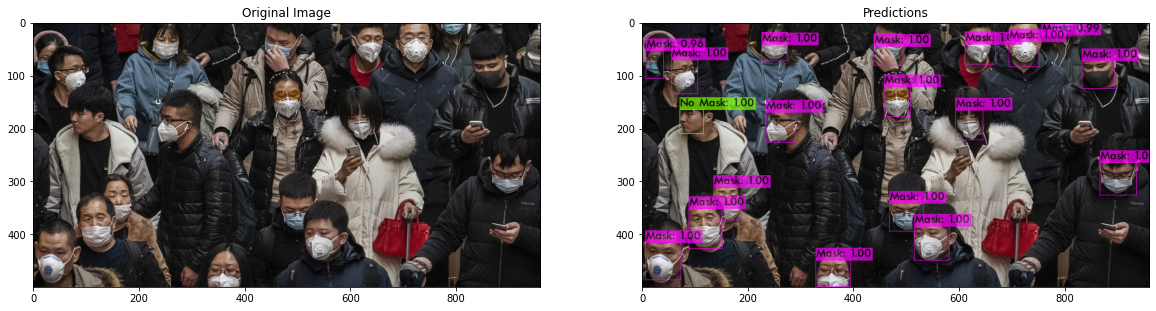

In [9]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-image3.jpg -thresh .6  2> /dev/null
display_output("test-image3.jpg")

#!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_final.weights test-image3.jpg -thresh .6  2> /dev/null
#display_output("test-image3.jpg")


In [10]:
%pwd

'/content/drive/My Drive/darknet'

**yolov3:  Test test image 4 for faces with or without mask**

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 211 K-images (3 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image4.jpg: Predicted in 17.685000 milli-seconds.
No Mask: 98%
No Mask: 93%
Mask: 100%
Mask: 100%
No Mask: 98%
Mask: 100%
No Mask: 94%
Mask: 100%


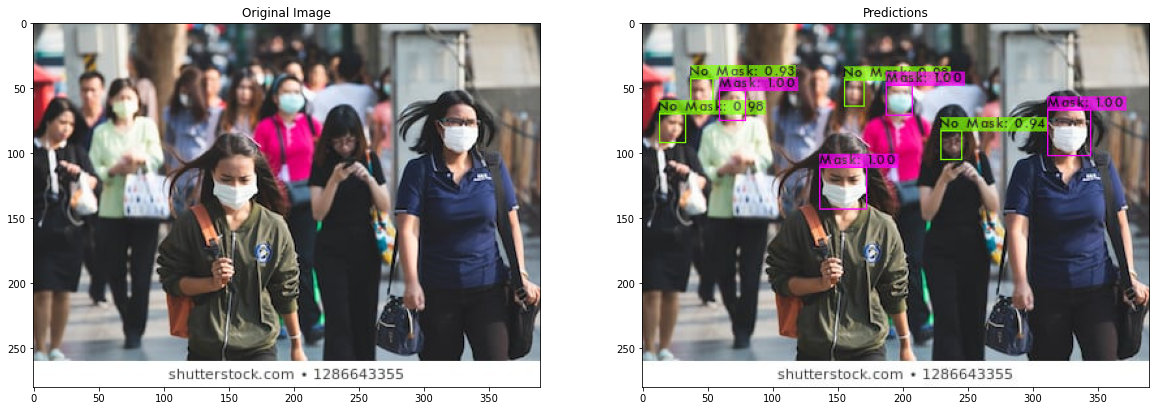

In [10]:
!./darknet detector test yolov3-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-image4.jpg -thresh .6  2> /dev/null
display_output("test-image4.jpg")

**yolov3:   Test video1 for faces with or without mask**

In [13]:
!./darknet detector demo yolov3-mask-setup.data yolov3-mask-train.cfg backup/yolov3-mask-train_best.weights test-video1.mp4 -thresh .6 -out_filename out-vid1_yolov3.avi -dont_show

Streaming output truncated to the last 5000 lines.
FPS:37.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 89% 

FPS:37.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 88% 

FPS:37.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 91% 

FPS:37.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 92% 

FPS:37.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 90% 

FPS:37.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 90% 

FPS:37.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 88% 

FPS:37.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 88% 

FPS:37.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask

**yolov3: Test vidio1 for faces with or without mask**

In [14]:
!./darknet detector demo yolov3-mask-setup.data yolov3-mask-train.cfg backup/yolov3-mask-train_best.weights test-video2.mp4 -thresh .6 -out_filename out-vid2_yolov3.avi -dont_show

Streaming output truncated to the last 5000 lines.

No Mask: 100% 
No Mask: 100% 
No Mask: 99% 
Mask: 91% 

FPS:37.2 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 99% 
No Mask: 96% 
Mask: 100% 

FPS:37.2 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 99% 
No Mask: 97% 
Mask: 100% 

FPS:37.2 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 99% 
No Mask: 95% 
Mask: 80% 

FPS:37.2 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 99% 
No Mask: 95% 
Mask: 96% 
Mask: 82% 

FPS:37.3 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 98% 
Mask: 99% 

FPS:37.3 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 100% 
No Mask: 64% 
Mask: 100% 

FPS:37.3 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 99% 
Mask: 99% 

FPS:37.3 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 100% 
Mask: 99% 

FPS:37.2 	 AVG_FPS:37.2

 cvWriteFrame 
Objects:

No Mask: 100% 
No Mask: 99% 